In [1]:
from utils import error_analysis

# 1. Steels

In [36]:
ea = error_analysis('matbench_steels','sigma_error')

In [37]:
ea.run_pca()

--------------------------------------------------
Component 1
--------------------------------------------------
-22.1% of ElementProperty|MagpieData mean NUnfilled
21.9% of ElementProperty|MagpieData mean NValence
-21.6% of ElementProperty|MagpieData mean NsUnfilled
-21.6% of ElementProperty|MagpieData avg_dev NsUnfilled
21.4% of ElementProperty|MagpieData mean NdValence
-21.3% of ElementProperty|MagpieData avg_dev MeltingT
21.2% of ElementFraction|Ni
-21.1% of ElementFraction|Cr
-20.8% of ElementProperty|MagpieData mean MeltingT
19.5% of ElementProperty|MagpieData mean Column


--------------------------------------------------
Component 2
--------------------------------------------------
23.7% of ValenceOrbital|avg p valence electrons
23.5% of ValenceOrbital|frac p valence electrons
22.9% of ElementProperty|MagpieData avg_dev MendeleevNumber
22.2% of ElementFraction|Si
-21.9% of TMetalFraction|transition metal fraction
21.8% of ElementProperty|MagpieData avg_dev GSvolume_pa
21.3% 

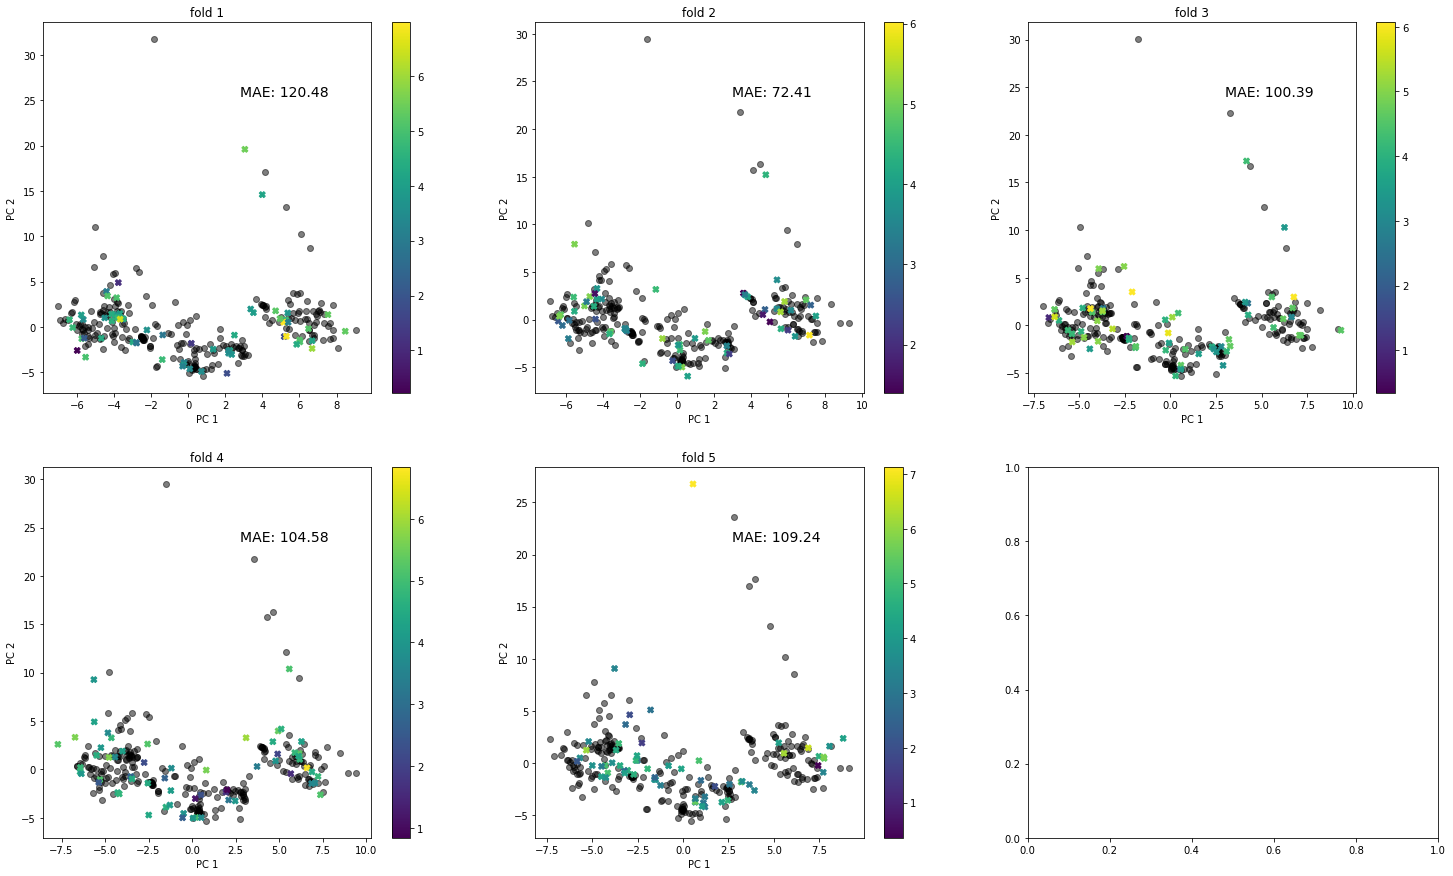

In [38]:
fig, axs = ea.plot_pca()

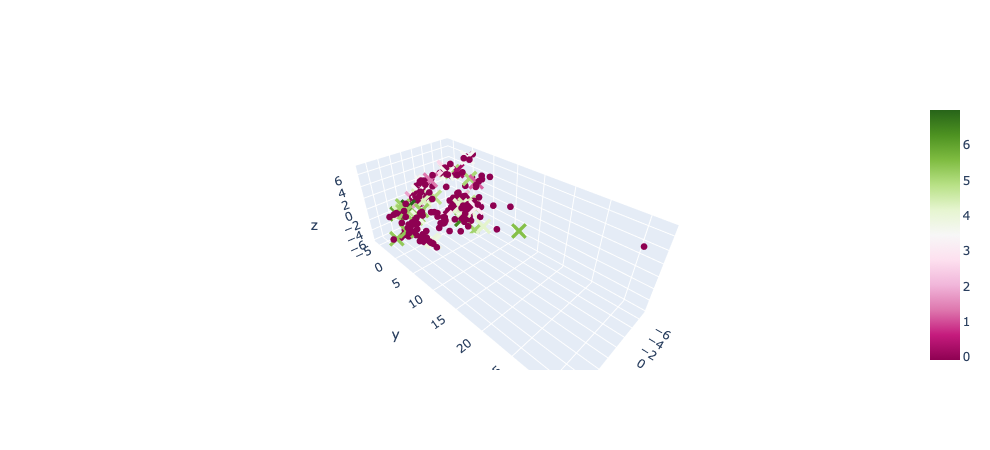

In [39]:
fig = ea.plot_pca_3D(fold=0)

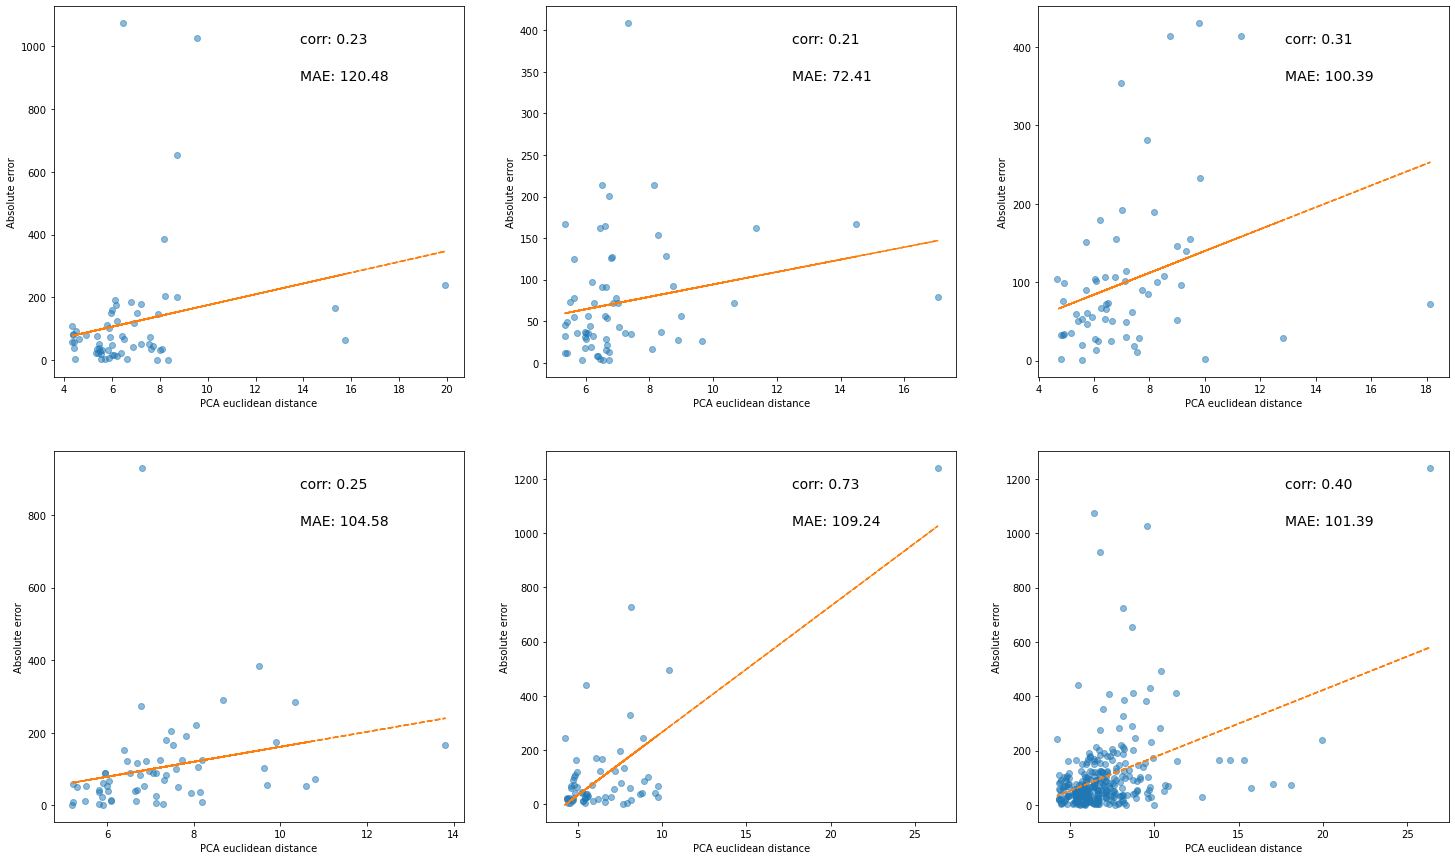

In [6]:
fig,axs = ea.plot_pca_distance(n_neighbours = 25, n_pc = 10,xmax=None)

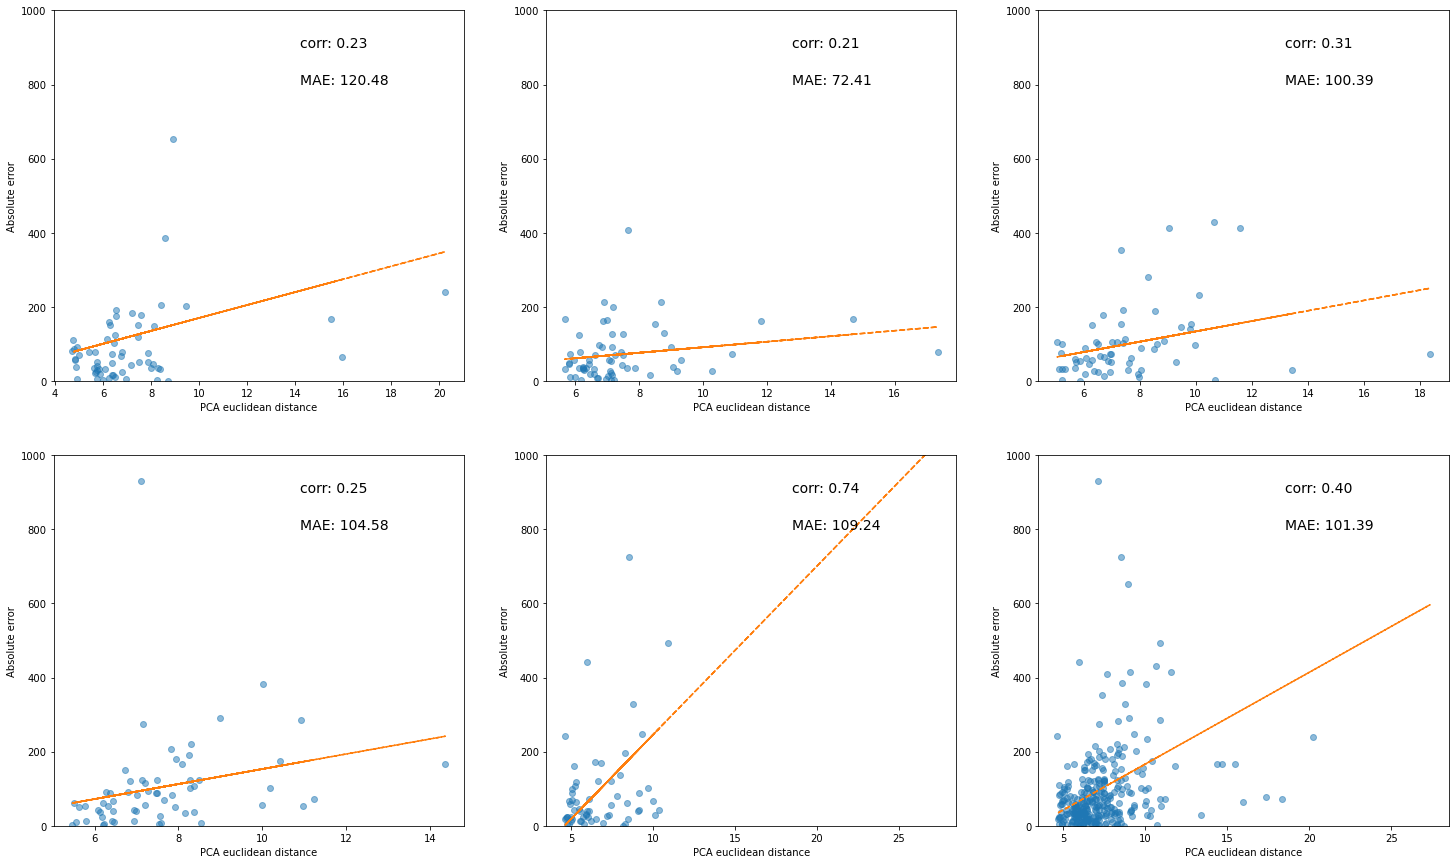

In [9]:
fig, axs = ea.plot_feat_distance(n_neighbours = 25, n_feat = 200, scaling= 'n',ymax=1000)

# 2. Dielectric

In [10]:
ea = error_analysis('matbench_dielectric','n_error')

In [11]:
ea.run_pca()

--------------------------------------------------
Component 1
--------------------------------------------------
11.1% of ElementProperty|MagpieData mean CovalentRadius
11.1% of ElementProperty|MagpieData mean Row
-10.8% of GeneralizedRDF|mean Gaussian center=1.0 width=1.0
10.5% of AverageBondLength|mean Average bond length
-10.4% of AGNIFingerPrint|mean AGNI eta=1.23e+00
-10.3% of AGNIFingerPrint|mean AGNI eta=1.88e+00
10.2% of ElementProperty|MagpieData mean Number
10.1% of ElementProperty|MagpieData mean AtomicWeight
9.6% of ElementProperty|MagpieData minimum CovalentRadius
-9.4% of AGNIFingerPrint|mean AGNI eta=2.89e+00


--------------------------------------------------
Component 2
--------------------------------------------------
-13.2% of StructuralHeterogeneity|max relative bond length
-13.2% of StructuralHeterogeneity|mean absolute deviation in relative bond length
-13.1% of BondOrientationParameter|std_dev BOOP Q l=6
-13.1% of StructuralHeterogeneity|avg_dev neighbor dista

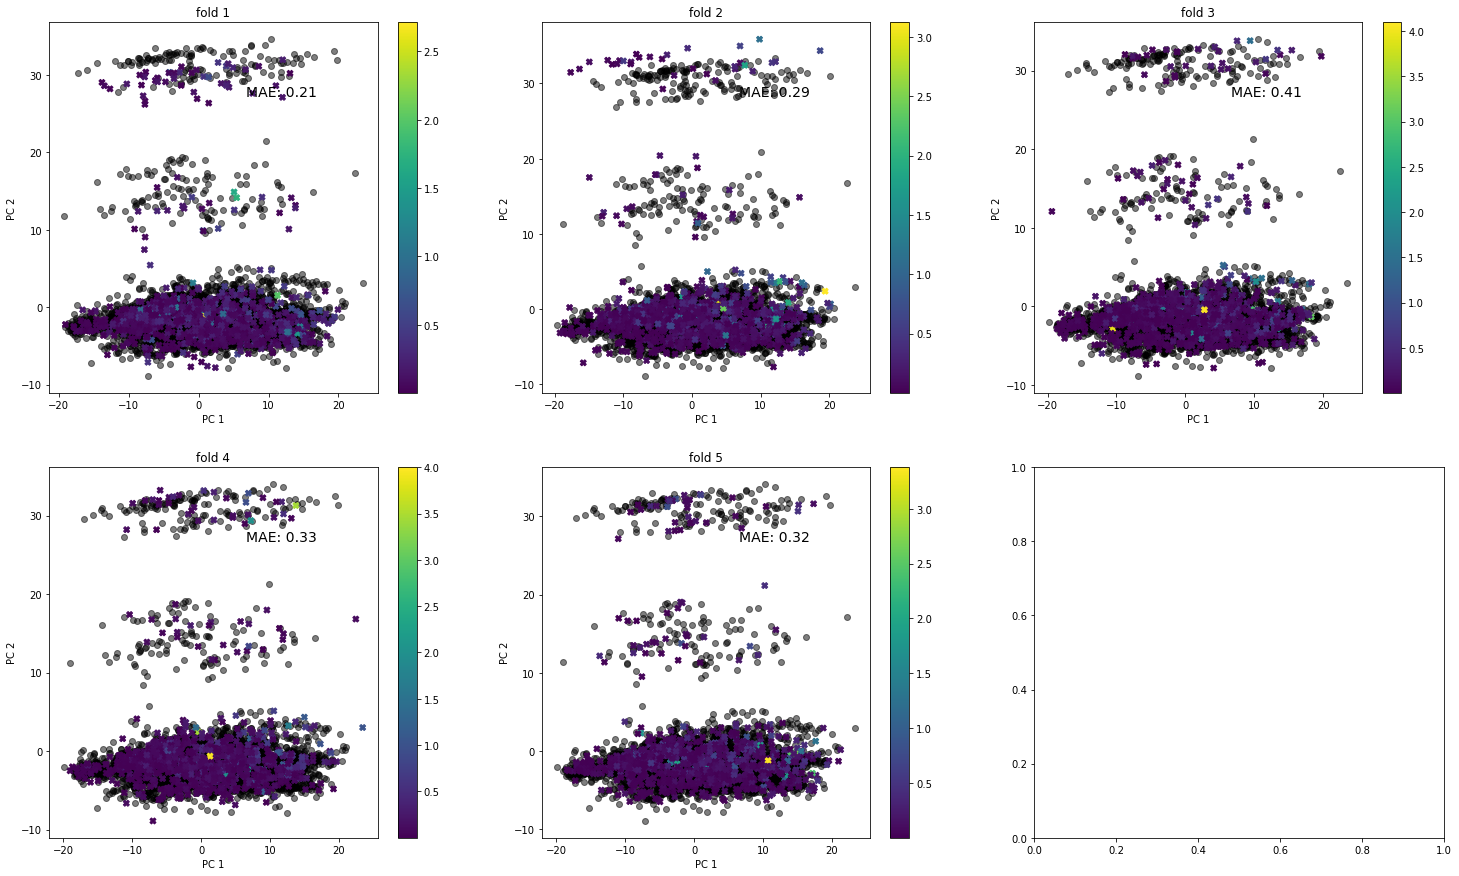

In [12]:
fig, axs = ea.plot_pca()

In [13]:
#fig = ea.plot_pca_3D(fold=0)

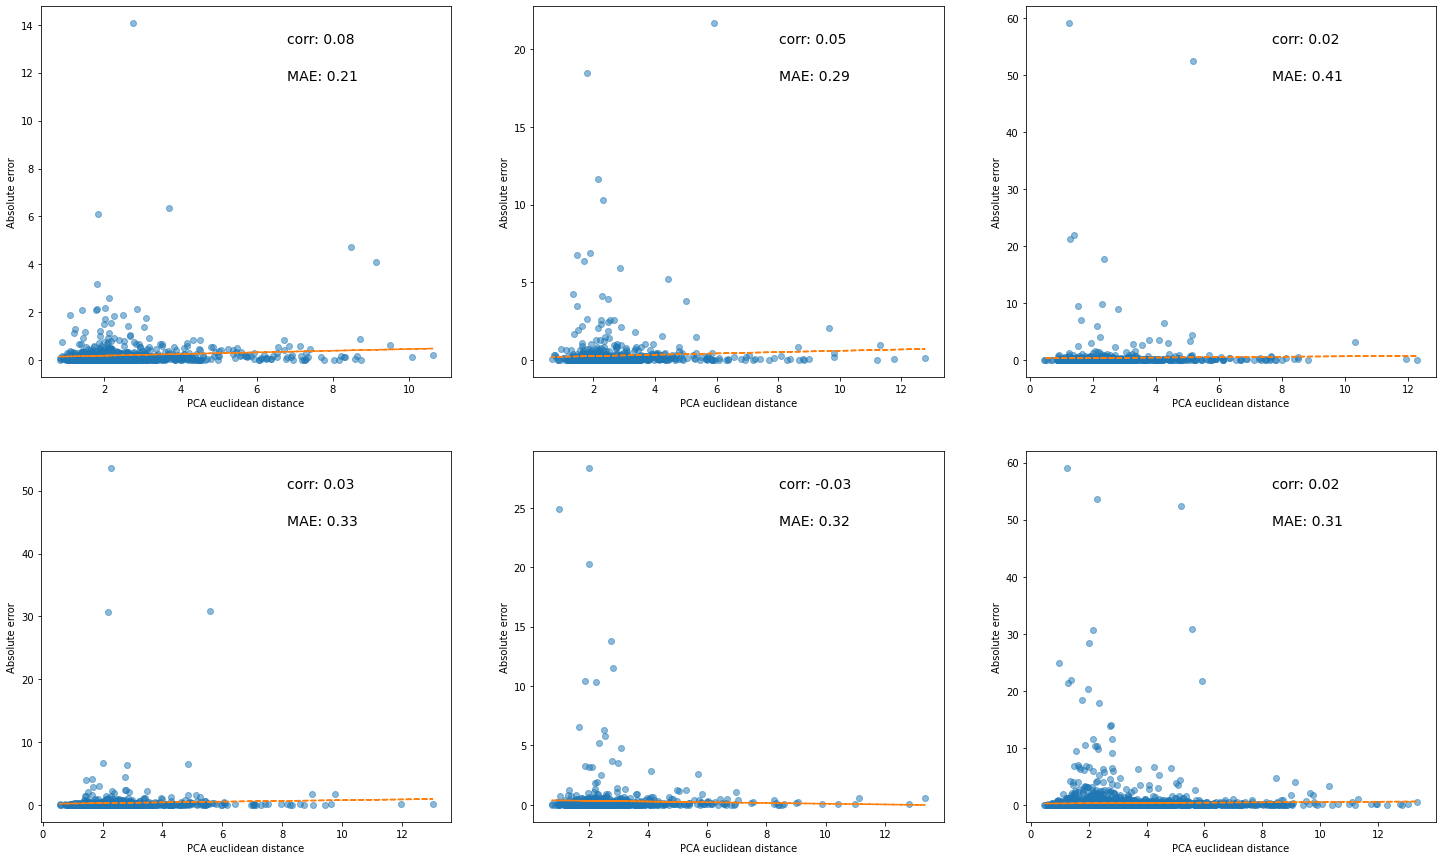

In [14]:
fig,axs = ea.plot_pca_distance(n_neighbours = 5, n_pc = 5)

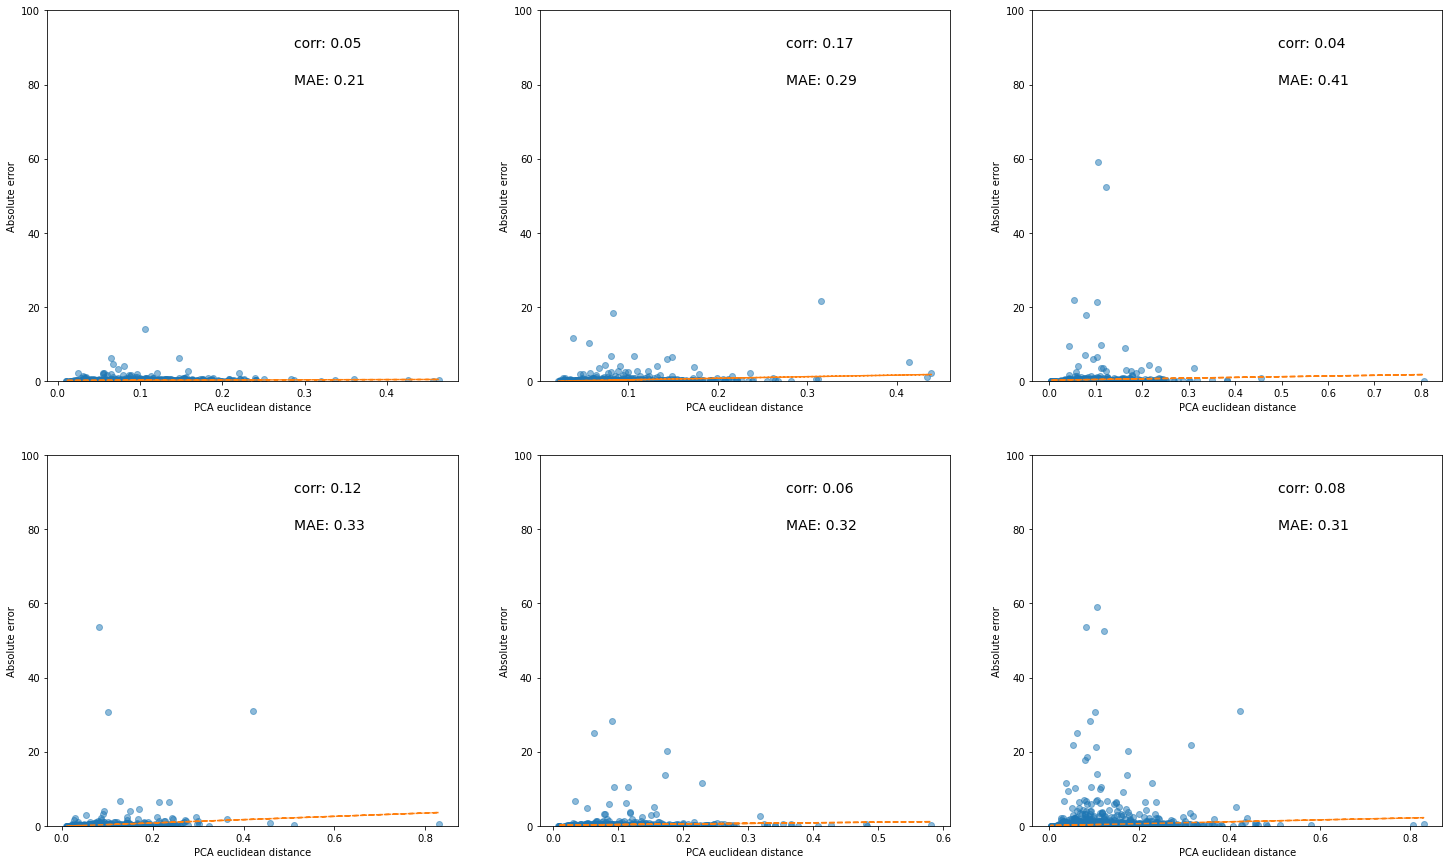

In [17]:
fig, axs = ea.plot_feat_distance(n_neighbours = 5, n_feat = 7, scaling= 'mm',ymax=100)

# 3. Expt gap

In [27]:
ea = error_analysis('matbench_expt_gap','E_g_error')

In [28]:
ea.run_pca()

--------------------------------------------------
Component 1
--------------------------------------------------
-17.1% of ValenceOrbital|frac p valence electrons
-16.7% of ElementProperty|MagpieData maximum Electronegativity
16.2% of ElementProperty|MagpieData minimum CovalentRadius
16.1% of ElementProperty|MagpieData mode CovalentRadius
15.7% of ElementProperty|MagpieData mode Row
-15.7% of ElementProperty|MagpieData range Electronegativity
15.6% of ElementProperty|MagpieData mean Row
-15.4% of ElementProperty|MagpieData mean Electronegativity
-15.1% of IonProperty|max ionic char
-15.1% of ElementProperty|MagpieData mode Electronegativity


--------------------------------------------------
Component 2
--------------------------------------------------
21.5% of ElementProperty|MagpieData minimum Column
21.5% of ElementProperty|MagpieData mean MendeleevNumber
21.0% of ElementProperty|MagpieData mean Column
19.1% of ElementProperty|MagpieData minimum MendeleevNumber
17.8% of ElementPr

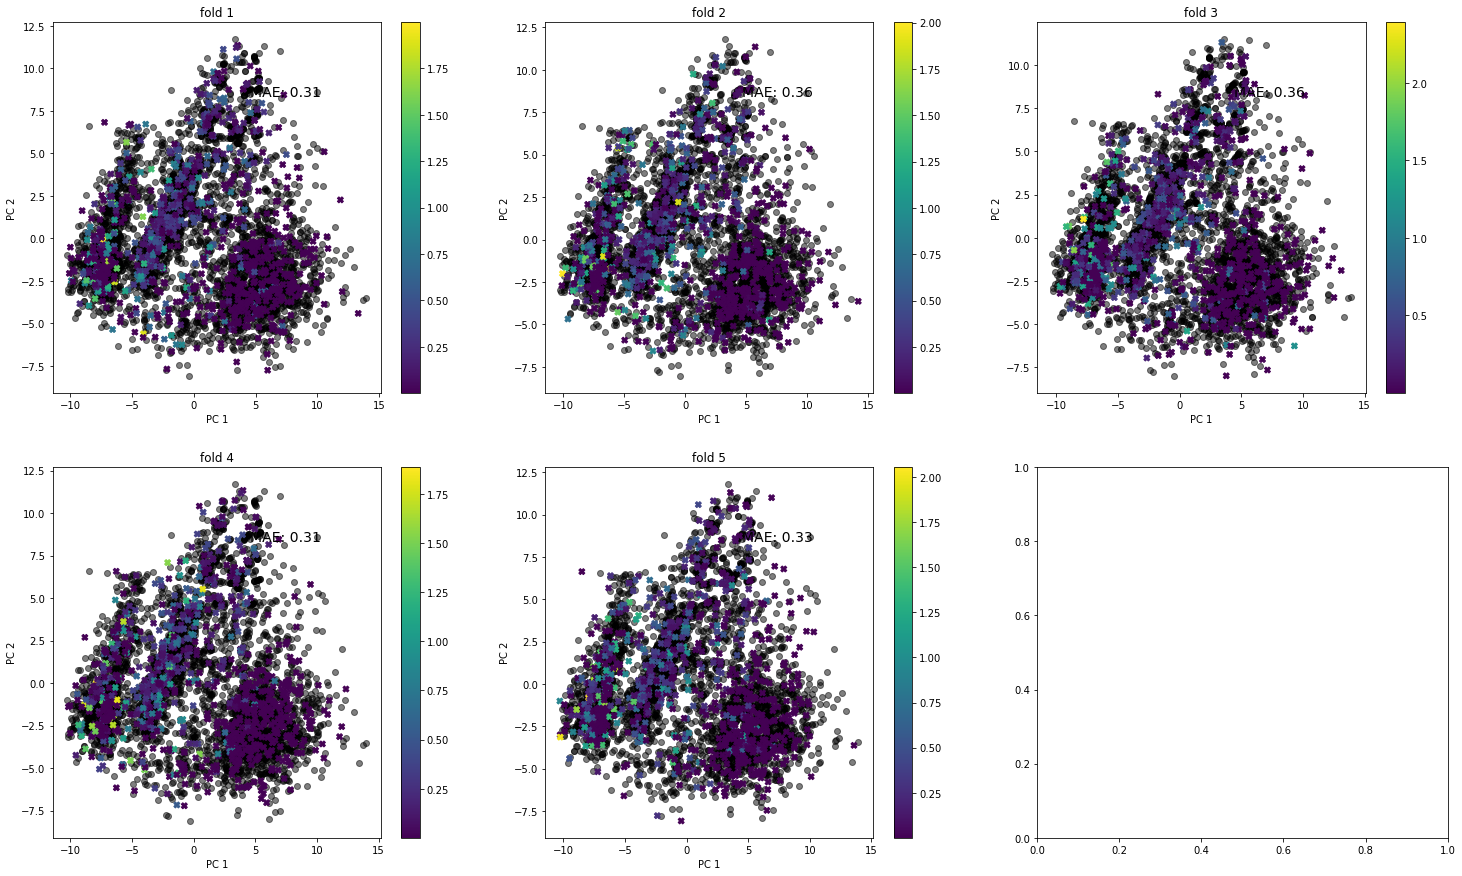

In [29]:
fig, axs = ea.plot_pca()

In [30]:
fig = ea.plot_pca_3D(fold=0)

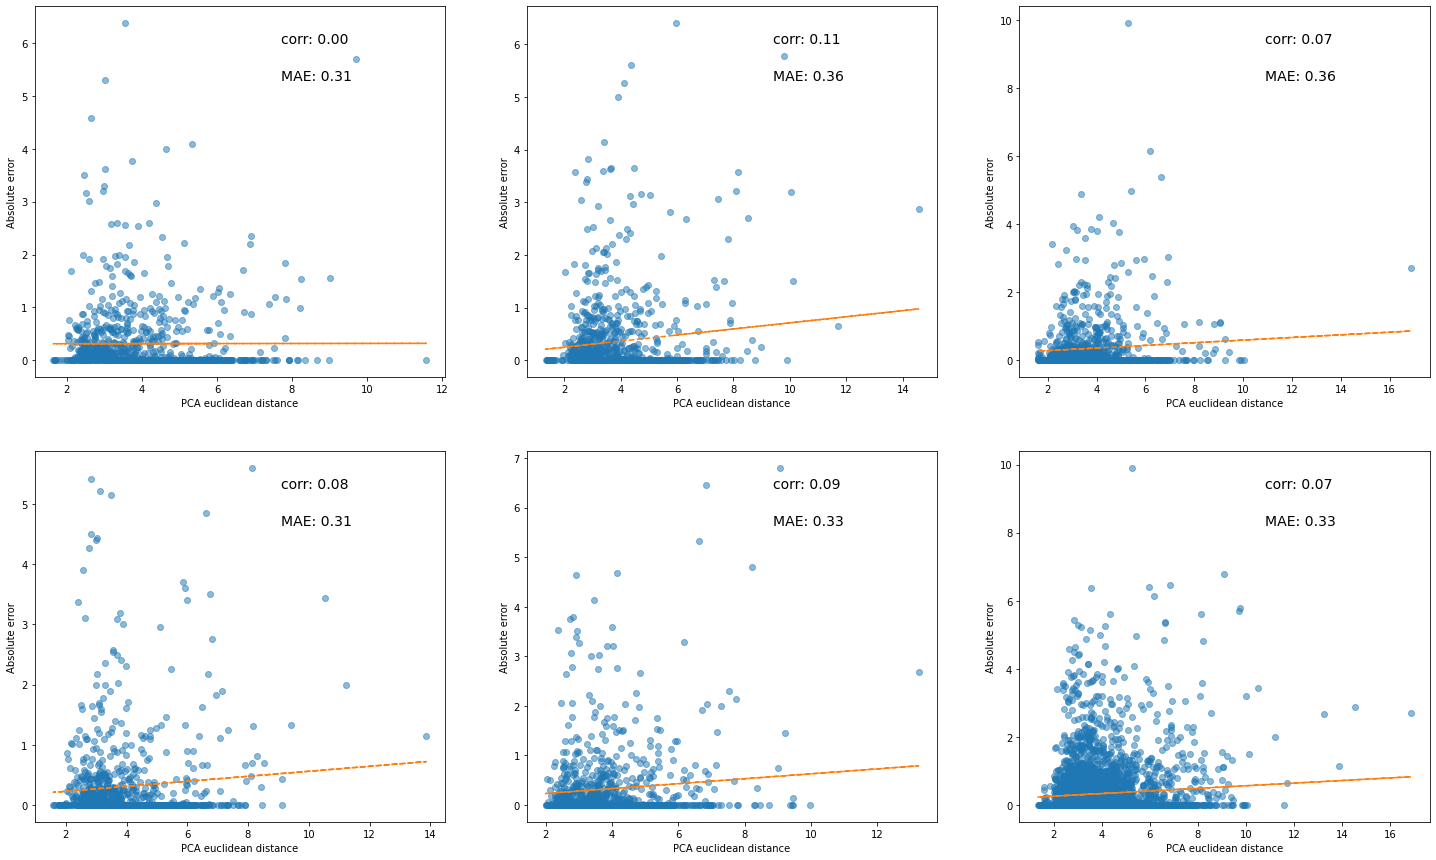

In [31]:
fig,axs = ea.plot_pca_distance(n_neighbours = 25, n_pc = 10)

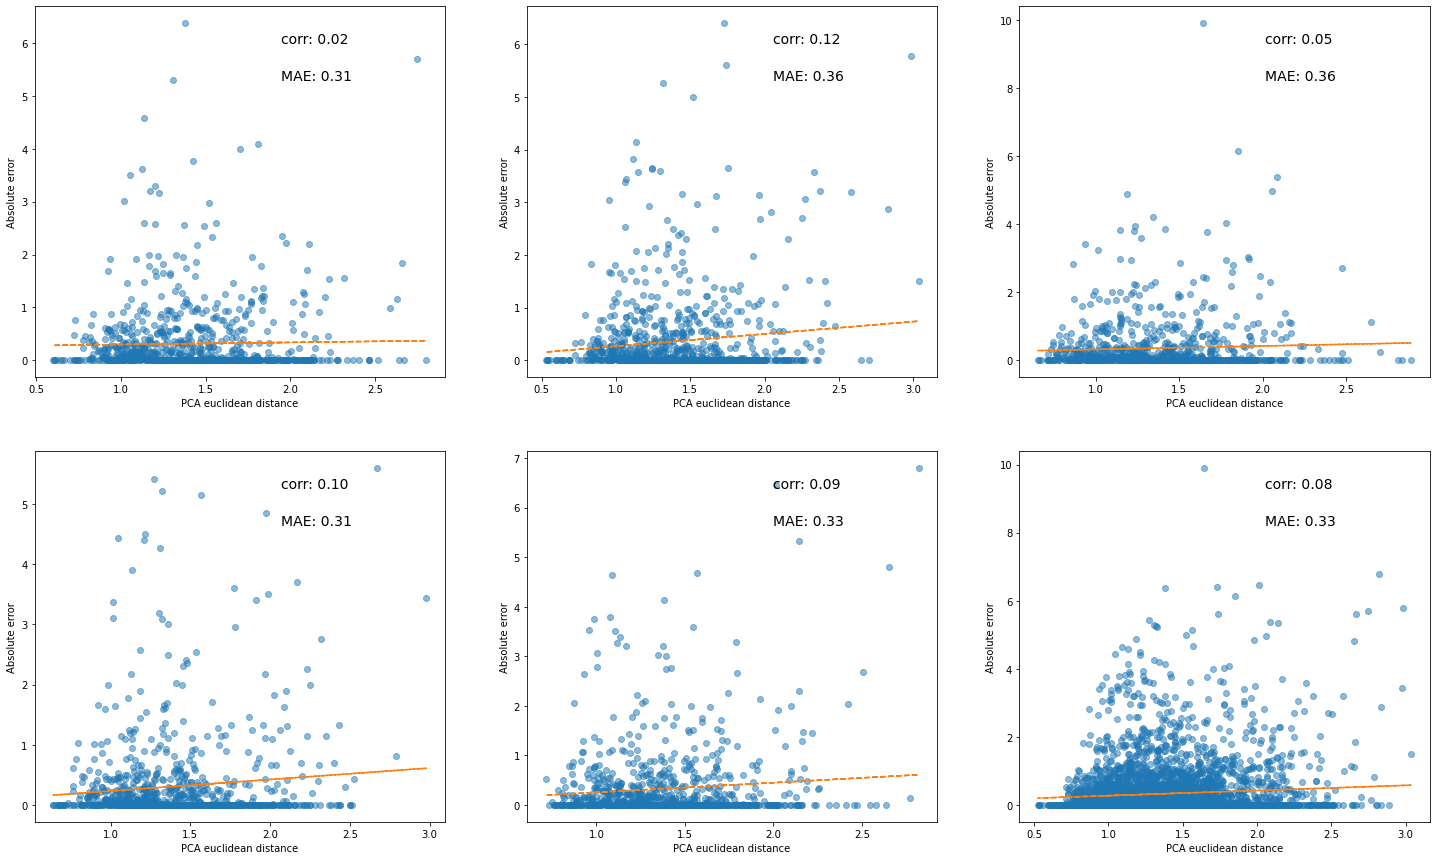

In [35]:
fig, axs = ea.plot_feat_distance(n_neighbours = 25, n_feat = 500, scaling= 'mm')